In [1]:
# Loading the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import tensorflow as tf

In [2]:
train = pd.read_csv("/content/drive/MyDrive/DL-project/sign_mnist_train.csv")
test = pd.read_csv("/content/drive/MyDrive/DL-project/sign_mnist_test.csv")

In [3]:
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,202,206,208,212,214,217,219,220,222,226,227,227,228,231,231,231,230,231,233,163,169,171,174,179,185,190,194,198,203,208,...,70,71,73,69,64,56,51,56,41,216,255,255,186,189,191,197,205,211,216,219,232,205,147,137,118,99,79,75,78,77,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,138,139,138,138,139,138,139,139,139,139,138,138,138,137,136,135,134,134,134,139,137,138,139,139,138,140,140,141,142,142,...,79,116,126,121,109,79,70,171,183,179,180,179,173,174,176,177,179,179,179,179,174,179,196,178,160,147,114,94,92,120,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,152,155,162,165,168,177,140,170,181,182,185,188,189,191,192,192,194,195,195,108,40,81,100,105,111,113,145,154,130,160,...,177,220,215,218,220,222,222,224,227,227,227,228,104,108,113,119,128,142,154,213,201,186,172,155,148,129,107,84,154,223,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,191,191,191,191,190,190,189,189,189,189,186,186,185,184,183,182,183,98,60,171,175,179,182,185,187,188,190,193,193,193,...,90,108,120,118,124,123,119,123,121,113,98,67,130,130,130,129,131,124,156,237,230,185,154,161,155,126,110,93,92,119,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,189,188,187,187,186,185,184,184,183,180,180,180,178,179,178,176,174,173,172,189,189,190,192,191,191,192,192,191,190,189,...,32,22,18,21,181,208,201,199,198,199,198,199,210,215,210,94,78,71,81,41,22,45,47,41,39,40,39,39,24,24,13,53,200,204,201,201,193,175,178,156


In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


In [5]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# put labels into y_test variable
Y_test = test["label"]
# Drop 'label' column
X_test = test.drop(labels = ["label"],axis = 1) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

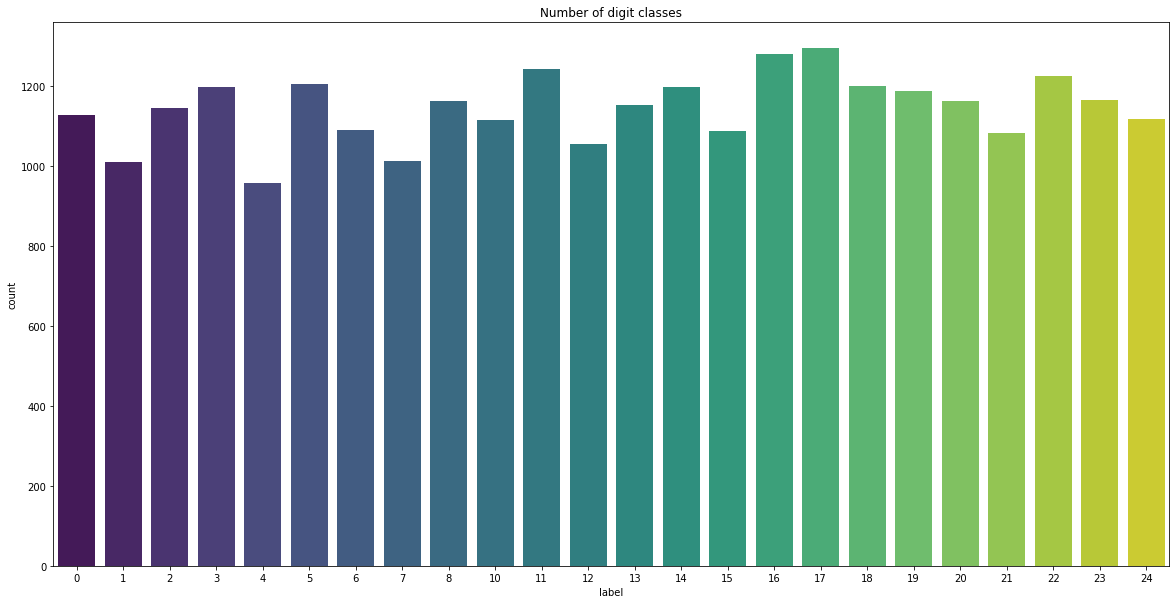

In [6]:
# visualize number of digits classes
plt.figure(figsize=(20,10))
g = sns.countplot(Y_train, palette="viridis")
plt.title("Number of digit classes")
#Y_train.value_counts()

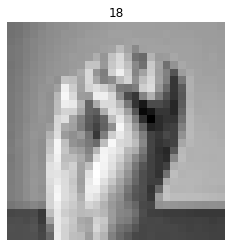

In [7]:
# plot some samples
img = X_train.iloc[10].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[10,0])
plt.axis("off")
plt.show()

In [8]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 784)
x_test shape:  (7172, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (27455, 28, 28, 1)
x_test shape:  (7172, 28, 28, 1)


In [10]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 25)
Y_test = to_categorical(Y_test, num_classes = 25)

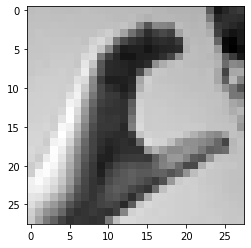

In [11]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [12]:
#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint_filepath = 'best_model.hdf5'

callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)

callbacks = [callback_checkpoint, callback_learningrate]

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
#building CNN model

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation = "softmax"))

In [15]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0

In [17]:
epochs = 30  # for better result increase the epochs
batch_size = 128

In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=10,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [19]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,
                                           Y_train, 
                                           batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_test,Y_test),
                             steps_per_epoch=X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
214/214 [==============================] - 52s 40ms/step - loss: 2.8984 - accuracy: 0.1392 - val_loss: 1.1705 - val_accuracy: 0.6924
Epoch 2/30
214/214 [==============================] - 8s 37ms/step - loss: 1.5247 - accuracy: 0.5129 - val_loss: 0.7331 - val_accuracy: 0.7883
Epoch 3/30
214/214 [==============================] - 8s 36ms/step - loss: 1.1141 - accuracy: 0.6330 - val_loss: 0.4526 - val_accuracy: 0.8781
Epoch 4/30
214/214 [==============================] - 9s 41ms/step - loss: 0.8710 - accuracy: 0.7101 - val_loss: 0.3714 - val_accuracy: 0.8890
Epoch 5/30
214/214 [==============================] - 9s 41ms/step - loss: 0.7309 - accuracy: 0.7545 - val_loss: 0.2755 - val_accuracy: 0.9296
Epoch 6/30
214/214 [==============================] - 9s 40ms/step - loss: 0.6294 - accuracy: 0.7896 - val_loss: 0.2386 - val_accuracy: 0.9264
Epoch 7/30
214/214 [==============================] - 8s 38ms/step - loss: 0.5541 - accuracy: 0.8150 - val_loss: 0.1966 - val_accuracy: 0.953

In [20]:
print("Accuracy of the model is - " , model.evaluate(X_test,Y_test)[1]*100 , "%")

225/225 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9972
Accuracy of the model is -  99.72113966941833 %


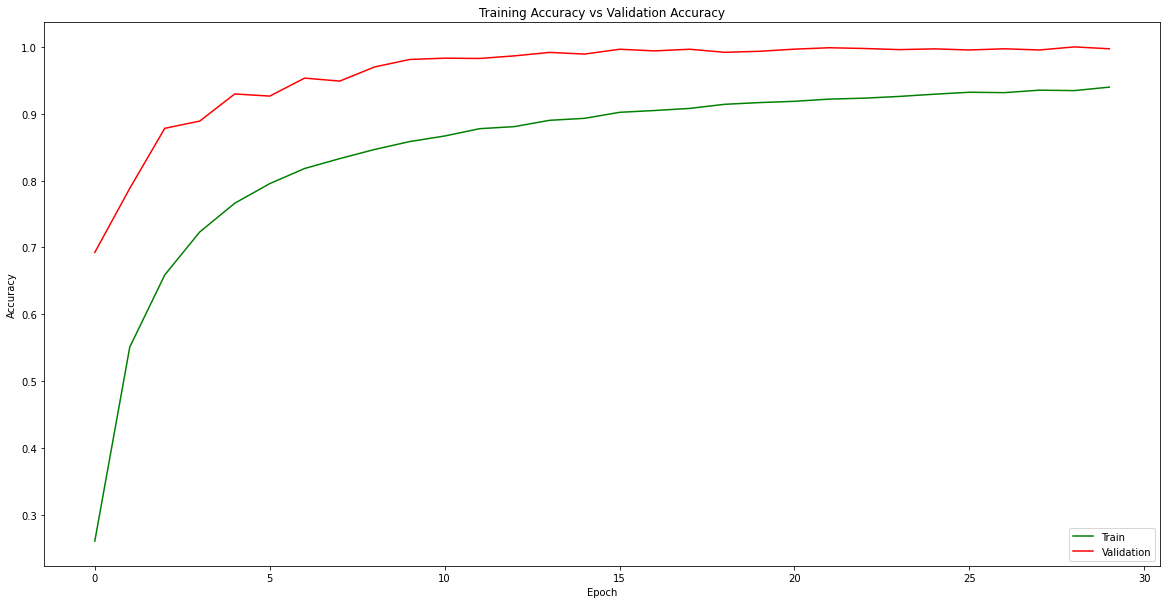

In [27]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'], color='green',)
plt.plot(history.history['val_accuracy'], color='red',)
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

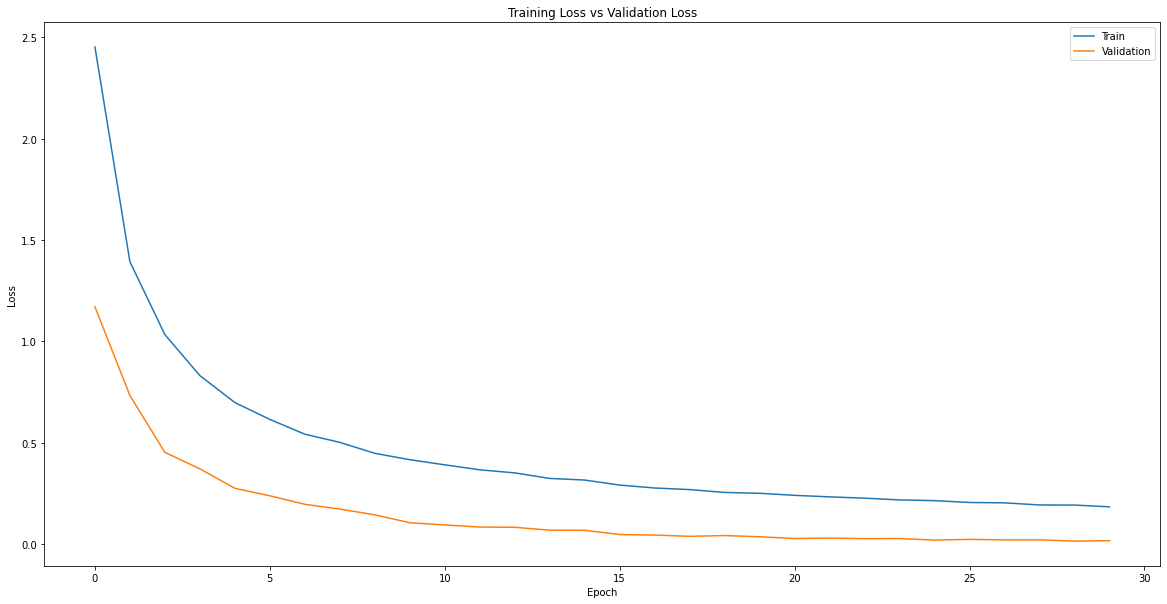

In [28]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
confusion_mtx = pd.DataFrame(confusion_mtx , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

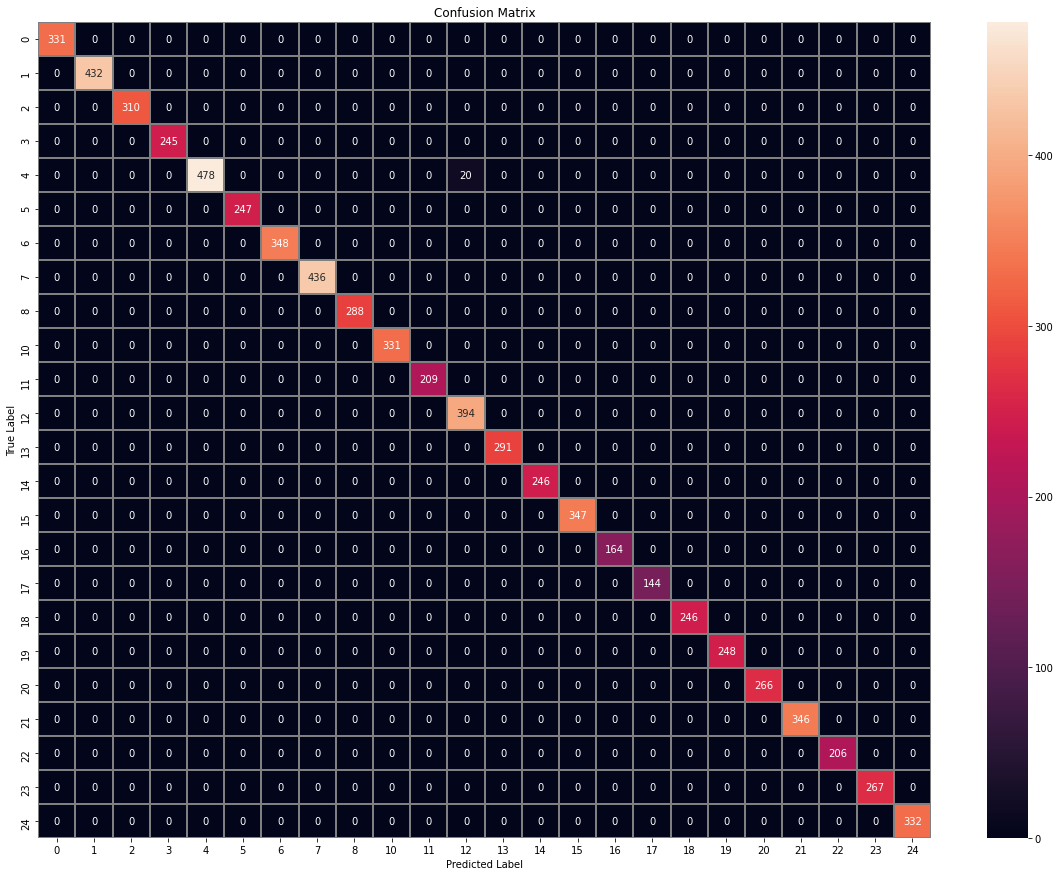

In [25]:
# plot the confusion matrix
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(confusion_mtx, annot=True, linewidths=1,linecolor="gray", fmt= '',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()